In [10]:
#Plot Jaz current vs time from sense resistor. I downloaded pressureVsCurrent10min250Vpp400Hz.lvm
#Then I renamed it to TPC400Hz.txt -- no other changes
#Original data in LabView lvm files looks like a tab delimited text file

SenseResistance=100 #Sense resistor value in ohms. 
#This resistor is in series between the ICEO cell and ground. 
#The voltage that develops across it is proportional to the current through the ICEO cell.

#now bring in the data and create variables for plots
import numpy as np
#ICEOData= np.loadtxt('TPC400Hz.txt', delimiter='\t') 
ICEOData= np.loadtxt('TPCTriangle10k.txt', delimiter='\t') 
Timebase=ICEOData[:,0]#Going ahead and assuming timebase in seconds. 
#Turns out to be consistent w the 400 Hz signal and with the overall 10 minute length.
PressureData=ICEOData[:,1] #Assuming the rest of data is in volts
CurrentData=[CurrentDatum/SenseResistance for CurrentDatum in ICEOData[:,2]] #Puts current into units of amperes


In [13]:
Timebase[0:10],PressureData[0:10],CurrentData[0:10] #check out what this data looks like
len(Timebase)

1867832

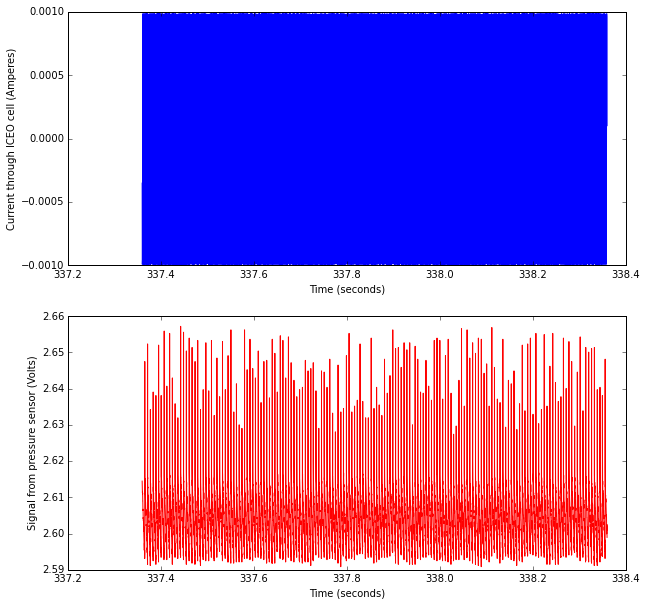

In [14]:
#plot all the data
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(Timebase[1:10000],CurrentData[1:10000])
plt.hold('True')

plt.xlabel('Time (seconds)')
plt.ylabel('Current through ICEO cell (Amperes)')

plt.subplot(2,1,2)
plt.plot(Timebase[1:10000],PressureData[1:10000],'r-')#pressure data should go in a different subplot
#with a different y axis label
plt.xlabel('Time (seconds)')
plt.ylabel('Signal from pressure sensor (Volts)')

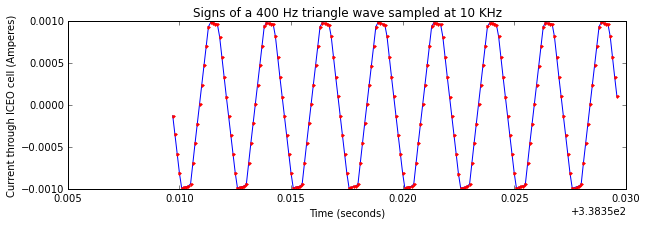

In [24]:
#plot just a short period of the data to see the 400 Hz square wave
plt.figure(figsize=(10,3))
plt.plot(Timebase[10000:10200],CurrentData[10000:10200])
plt.hold('True')
plt.plot(Timebase[10000:10200],CurrentData[10000:10200],'r.')
plt.xlabel('Time (seconds)')
plt.ylabel('Current through ICEO cell (Amperes)')
plt.title('Signs of a 400 Hz triangle wave sampled at 10 KHz')

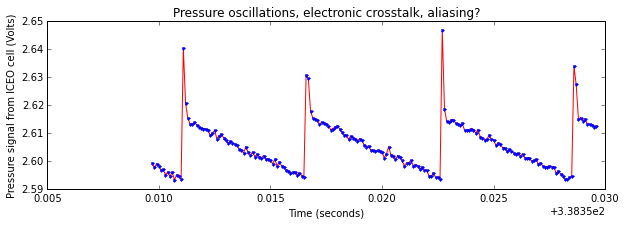

In [23]:
#what is the pressure doing during the same time???
plt.figure(figsize=(10,3))
plt.plot(Timebase[10000:10200],PressureData[10000:10200],'r')
plt.hold('True')
plt.plot(Timebase[10000:10200],PressureData[10000:10200],'b.')

plt.xlabel('Time (seconds)')
plt.ylabel('Pressure signal from ICEO cell (Volts)')
plt.title('Pressure oscillations, electronic crosstalk, aliasing?')


In [36]:
#The sense resistor is working well here at 250V pp. 
#We got new information, you are sending approx 1 Watt into the system at peak times ( 250V * 0.004A)
#and now can talk about efficiency of conversion from electrical to mechanical power

#Getting an IV curve as a possible plot for Fig 4:
#Can you either sample at a higher frequency, like 10KHz, or go to a lower driving frequency? 100-200Hz, or both
#Also, go to a sine wave input
#Because if you have like 10 or 20 samples per sinewave cycle, you can plot smooth-valued current vs voltage data (IV curves)
#To achieve this you also would need the voltage data from the function generator-- 
#just T off the function generator at low voltage before it goes into the Trek
#and put that into a fourth LabView column.
#It would be interesting to compare IV with metal, to IV curve without metal or to double sided metal.

#Are the pressure oscillations real? If it's getting rectified because of the ICEO effect, 
#it should be dropping at the edges of the square wave when ions are rearranging, 
#and increasing both when the square wave is negative and positive. 
#That would mean a pressure signal oscillating at 800 Hz. It's too fast to be spotted
#with a 1000 Hz sampling frequency so would appear as a lower frequency signal (aliasing)
#Also possible: rapid high voltage switching at squarewave edges can cause inductive pickup
#at the pressure sensor. This electronic crosstalk could add high frequency noise to your signal 
#that isn't originating from pressure in the ICEO cell. 

#UPDATE: the higher 10kHz sampling rate showed that the pressure oscillation signal isn't aliasing to look like a
#lower frequency. It's not really synced with the triangle wave from the function gen, either. Why is it a sawtooth? Does the sawtooth
#frequency change with function generator frequency? Figuring this out would explain the pressure "noise"
#which we have been averaging out since the first experiments. Does the P-sensor datasheet have any explanations?

#Lower voltages may produce smaller currents, harder to measure-- if we start to see the digital levels of the
#LabView system it means we must amplify the current signal before collecting data with LabView
